In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install numpy torch wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 17.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
!pip install swig
!pip install gymnasium[box2d]
!pip install matplotlib termcolor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376094 sha256=0b4e413dd6fafb20cd8146e6e0b318169009bc349cf7197018e3d66790538751
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/RL-part1

/content/drive/My Drive/RL-part1


In [6]:
import test1
from utils import *

# Reinforcement Learning Part 1: DQN
By Lawrence Liu and Tonmoy Monsoor
## Some General Instructions

- As before, please keep the names of the layer consistent with what is requested in model.py. Otherwise the test functions will not work

- You will need to fill in the model.py, the DQN.py file, the buffer.py file, and the
env_wrapper.py

DO NOT use Windows for this project, gymnasium does is not supported for windows and installing it will be a pain.

### Introduction to the Enviroment
We will be training a DQN agent to play the game of CarRacing. The agent will be trained to play the game using the pixels of the game as an input. The reward structure is as follows for each frame:
- -0.1 for each frame
- +1000/N where N is the number of tiles visited by the car in the episode

The overall goal of this game is to design a agent that is able to play the game with a average test score of above 600. In discrete mode the actions can take 5 actions,
- 0: Do Nothing
- 1: Turn Left
- 2: Turn Right
- 3: Accelerate
- 4: Brake

First let us visualize the game and understand the environment.

In [7]:
import gymnasium as gym
import numpy as np
env = gym.make('CarRacing-v2', continuous=False, render_mode='rgb_array')
env.np_random = np.random.RandomState(42)

In [8]:

from IPython.display import HTML

frames = []
s, _ = env.reset()

while True:
    a = env.action_space.sample()
    s, r, terminated, truncated, _ = env.step(a)
    frames.append(s)
    if terminated or truncated:
        break


anim = animate(frames)
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

So a couple things we can note:
- at the beginning of the game, we have 50 frames of the game slowly zooming into the car, we should ignore this period, ie no-op during this period.
- there is a black bar at the bottom of the screen, we should crop this out of the observation.

In addition, another thing to note is that the current frame doesn't give much information about the velocity and acceleration of the car, and that the car does not move much for each frame.
### Environment Wrapper (5 points)
As a result, you will need to complete `EnvWrapper` in `env_wrapper.py`. You can find more information in the docstring for the wrapper, however the main idea is that it is a wrapper to the environment that does the following:
- skips the first 50 frames of the game
- crops out the black bar and reshapes the observation to a 84x84 image, as well as turning the resulting image to grayscale
- performs the actions for `skip_frames` frames
- stacks the last `num_frames` frames together to give the agent some information about the velocity and acceleration of the car.


In [9]:
from env_wrapper import EnvWrapper
import test1
test1.test_wrapper(EnvWrapper)

Passed reset
Passed step


### CNN Model (5 points)
Now we are ready to build the model. Our architecture of the CNN model is the one proposed by Mnih et al in "Human-level control through deep reinforcement learning". Specifically this consists of the following layers:
- A convolutional layer with 32 filters of size 8x8 with stride 4 and relu activation
- A convolutional layer with 64 filters of size 4x4 with stride 2 and relu activation
- A convolutional layer with 64 filters of size 3x3 with stride 1 and relu activation
- A fully connected layer with 512 units and relu activation
- A fully connected layer with the number of outputs of the environment

Please implement this model `Nature_Paper_Conv` in `model.py` as well as the helper
`MLP` class.

In [ ]:
import model
test1.test_model_DQN(model.Nature_Paper_Conv)

Passed


### DQN (40 points)
Now we are ready to implement the DQN algorithm.

![title](DQN.png)

#### Replay Buffer (5 points)
First start by implementing the DQN replay buffer `ReplayBufferDQN` in `buffer.py`. This buffer will store the transitions of the agent and sample them for training.

In [ ]:
from replay_buffer import ReplayBufferDQN

test1.test_DQN_replay_buffer(ReplayBufferDQN)

Passed



#### DQN (15 points)
Now implement the `_optimize_model` and `sample_action` functions in `DQN` in `DQN.py`. The `_optimize_model` function will sample a batch of transitions from the replay buffer and update the model. The `sample_action` function will sample an action from the model given the current state. Train the model over 200 episdoes, validating every 50 episodes for 30 episodes, before testing the model for 50 episodes at the end.

In [ ]:
import DQN
import utils
import torch


trainerDQN = DQN.DQN(EnvWrapper(env),
                model.Nature_Paper_Conv,
                lr = 0.00025,
                gamma = 0.95,
                buffer_size=10000,
                batch_size=16,
                loss_fn = "mse_loss",
                use_wandb = False,
                device = 'cuda',
                seed = 42,
                epsilon_scheduler = utils.exponential_decay(1, 700,0.1),
                save_path = utils.get_save_path("DQN","./runs/"))

train_reward_history, train_loss_history, val_reward_history, val_std_history = trainerDQN.train(200,50,30,50,50)



saving to ./runs/DQN/run26


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Episode: 0: Time: 11.445632219314575 Total Reward: -40.51282051282131 Avg_Loss: 14.468805525593366
Episode: 1: Time: 13.478474378585815 Total Reward: -25.656934306569404 Avg_Loss: 0.867150462584711
Episode: 2: Time: 12.737560272216797 Total Reward: -19.999999999999915 Avg_Loss: 0.8739259843910191
Episode: 3: Time: 13.51858639717102 Total Reward: -41.12794612794708 Avg_Loss: 0.8265406644175283
Episode: 4: Time: 12.661712408065796 Total Reward: 10.633802816900744 Avg_Loss: 0.942855176930668
Episode: 5: Time: 12.117448806762695 Total Reward: -37.74809160305395 Avg_Loss: 0.9851125459335431
Episode: 6: Time: 9.891719579696655 Total Reward: -48.89999999999824 Avg_Loss: 1.1258797562202891
Episode: 7: Time: 13.160756349563599 Total Reward: -47.89855072463841 Avg_Loss: 3.7290246750251588
Episode: 8: Time: 14.47135066986084 Total Reward: 67.87878787878869 Avg_Loss: 10.816814754314784
Episode: 9: Time: 12.726099967956543 Total Reward: 12.843137254902823 Avg_Loss: 1.407932592446313
Episode: 10: Ti

In [ ]:
import matplotlib.pyplot as plt
def plotgraphs(train_reward_history, train_loss_history, val_reward_history, val_std_history):
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.plot(np.arange(len(train_reward_history)), train_reward_history)
  plt.title('Training Rewards Over Episodes')
  plt.xlabel('Episodes')
  plt.ylabel('Training Rewards')
  plt.subplot(1,2,2)
  plt.plot(np.arange(len(train_loss_history)), train_loss_history)
  plt.title('Training Loss Over Episodes')
  plt.xlabel('Episodes')
  plt.ylabel('Training Loss')

  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(np.arange(len(val_reward_history)), val_reward_history)
  plt.title('Validation Rewards Over Episodes')
  plt.xlabel('Episodes')
  plt.ylabel('Validation Rewards')
  plt.subplot(1,2,2)
  plt.plot(np.arange(len(val_std_history)), val_std_history)
  plt.title('Validation STD Over Episodes')
  plt.xlabel('Episodes')
  plt.ylabel('Validation STD')

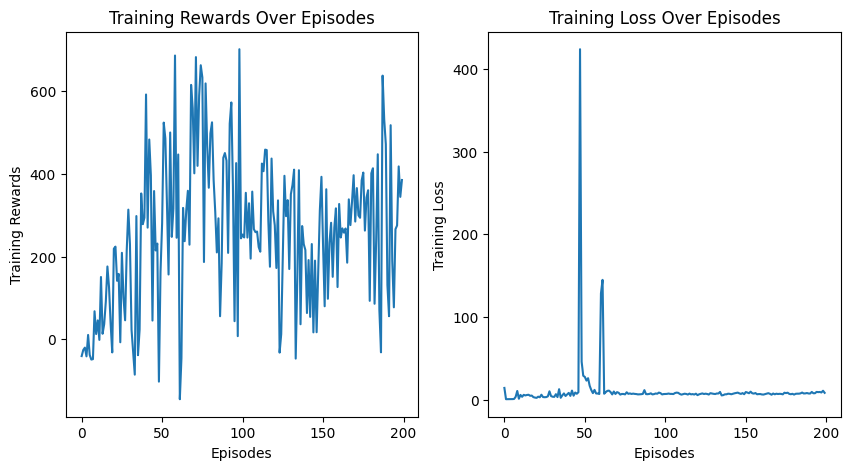

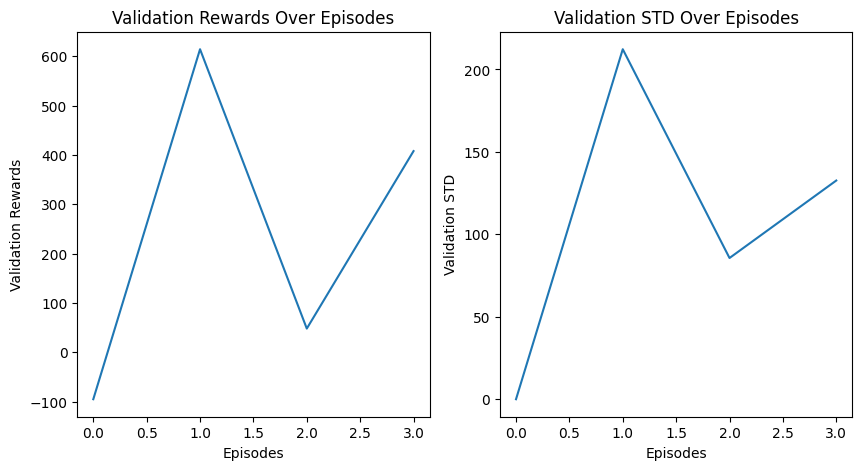

In [ ]:
plotgraphs(train_reward_history, train_loss_history, val_reward_history, val_std_history)

Please include a plot of the training and validation rewards over the episodes in the report. An additional question to answer is does the loss matter in DQN? Why or why not?

**Answer**
The loss is important in the sense that DQN uses the Bellman equation to minimize the loss function, which allows us to learn a good Q function.
Experimentally, while the loss hovers around a small number (~8-9) without going any lower, this is intuitive and not really concerning considering we only trained for 200 episodes and are fitting the model to itself, which is a moving target.

We can also draw a animation of the car in one game, the code is provided below

In [ ]:
eval_env = gym.make('CarRacing-v2', continuous=True, render_mode='rgb_array')
eval_env = EnvWrapper(eval_env)

total_rewards, frames = trainerDQN.play_episode(0,True,42)
anim = animate(frames)
HTML(anim.to_jshtml())

### Double DQN
In the original paper, where the algorithim is shown above, the estimated target Q value was computed using the current Q network's weights. However, this can lead to overestimation of the Q values. To mitigate this, we can use the target network to compute the target Q value. This is known as Double DQN.
#### Hard updating Target Network (5 points)
Original implementations for this involved hard updates, where the model weights were copied to the target network every C steps. This is known as hard updating. This was what was used in the Nature Paper by Mnih et al 2015 "Human-level control through deep reinforcement learning"

Please implement this by implementing the `_optimize_model` and `_update_model` classes in `HardUpdateDQN` in `DQN.py`.


In [ ]:
import DQN
import utils
import torch
trainerHardUpdateDQN = DQN.HardUpdateDQN(EnvWrapper(env),
                model.Nature_Paper_Conv,
                update_freq = 100,
                lr = 0.00025,
                gamma = 0.95,
                buffer_size=10000,
                batch_size=16,
                loss_fn = "mse_loss",
                use_wandb = False,
                device = 'cuda',
                seed = 42,
                epsilon_scheduler = utils.exponential_decay(1, 1000,0.1),
                save_path = utils.get_save_path("DoubleDQN_HardUpdates/","./runs/"))

train_reward_history, train_loss_history, val_reward_history, val_std_history = trainerHardUpdateDQN.train(200,50,30,50,50)

saving to ./runs/DoubleDQN_HardUpdates/run0


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Episode: 0: Time: 13.129343271255493 Total Reward: -40.51282051282131 Avg_Loss: 0.6321769107746172
Episode: 1: Time: 13.785922050476074 Total Reward: -69.452554744526 Avg_Loss: 0.6203429482626814
Episode: 2: Time: 14.054795265197754 Total Reward: -16.428571428571228 Avg_Loss: 0.618322113567979
Episode: 3: Time: 16.826504230499268 Total Reward: -51.22895622895659 Avg_Loss: 0.7344336203933388
Episode: 4: Time: 13.982755899429321 Total Reward: -24.57746478873287 Avg_Loss: 0.6963774306668329
Episode: 5: Time: 13.306541681289673 Total Reward: 11.870229007633666 Avg_Loss: 0.8224907628878826
Episode: 6: Time: 13.29230523109436 Total Reward: 45.624999999999716 Avg_Loss: 0.9491971839501077
Episode: 7: Time: 13.085847616195679 Total Reward: -55.1449275362326 Avg_Loss: 0.985187614602702
Episode: 8: Time: 13.318267345428467 Total Reward: -49.545454545455456 Avg_Loss: 0.9384782315865785
Episode: 9: Time: 13.873620748519897 Total Reward: -39.4444444444449 Avg_Loss: 0.9811301706906628
Episode: 10: Ti

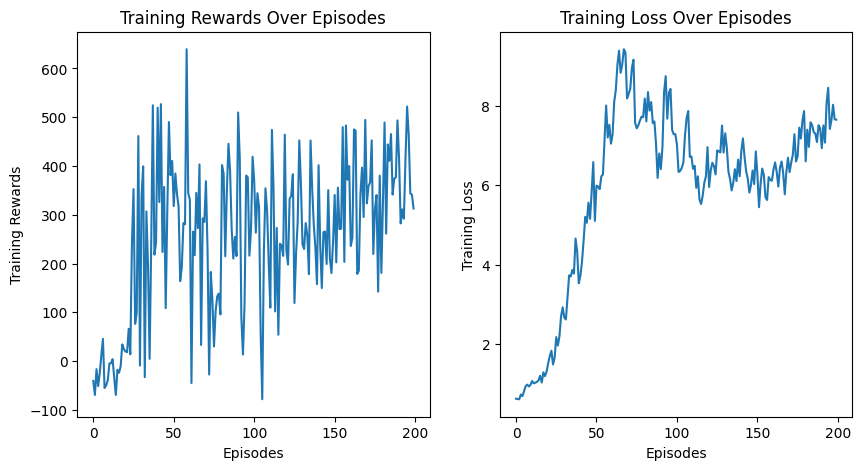

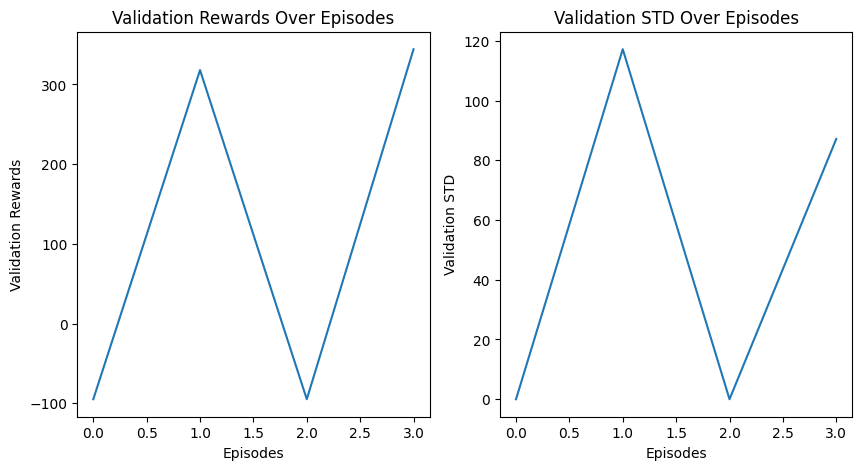

In [ ]:
plotgraphs(train_reward_history, train_loss_history, val_reward_history, val_std_history)

In [ ]:
total_rewards, frames = trainerHardUpdateDQN.play_episode(0,True,42)
anim = animate(frames)
HTML(anim.to_jshtml())

#### Soft Updates (5 points)
A more recent improvement is to use soft updates, also known as Polyak averaging, where the target network is updated with a small fraction of the current model weights every step. In other words:
$$\theta_{target} = \tau \theta_{model} + (1-\tau) \theta_{target}$$
for some $\tau << 1$
Please implement this by implementing the `_update_model` class in `SoftUpdateDQN` in `DQN.py`.

In [ ]:
import DQN
import utils
import torch

traineSoftUpdateDQN = DQN.SoftUpdateDQN(EnvWrapper(env),
                model.Nature_Paper_Conv,
                tau = 0.01,
                update_freq = 1,
                lr = 0.00025,
                gamma = 0.95,
                buffer_size=10000,
                batch_size=16,
                loss_fn = "mse_loss",
                use_wandb = False,
                device = 'cuda',
                seed = 42,
                epsilon_scheduler = utils.exponential_decay(1, 1000,0.1),
                save_path = utils.get_save_path("DoubleDQN_SoftUpdates","./runs/"))

train_reward_history, train_loss_history, val_reward_history, val_std_history = traineSoftUpdateDQN.train(200,50,30,50,50)

saving to ./runs/DoubleDQN_SoftUpdates/run5


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Episode: 0: Time: 15.749996900558472 Total Reward: -40.51282051282131 Avg_Loss: 0.631016575082948
Episode: 1: Time: 13.832481384277344 Total Reward: -69.452554744526 Avg_Loss: 0.6227062279436769
Episode: 2: Time: 14.419142246246338 Total Reward: -27.14285714285711 Avg_Loss: 0.6073106486866829
Episode: 3: Time: 14.313307762145996 Total Reward: -78.16498316498311 Avg_Loss: 0.6219855000523209
Episode: 4: Time: 11.348246812820435 Total Reward: -39.176056338026406 Avg_Loss: 0.7563412795134354
Episode: 5: Time: 13.443756818771362 Total Reward: -26.297709923664836 Avg_Loss: 12.718749041927337
Episode: 6: Time: 13.365679740905762 Total Reward: -48.125000000000696 Avg_Loss: 5.126850762834945
Episode: 7: Time: 13.33103895187378 Total Reward: -37.02898550724693 Avg_Loss: 6.20538951220977
Episode: 8: Time: 14.144004106521606 Total Reward: -34.393939393939746 Avg_Loss: 2.1964833480540755
Episode: 9: Time: 14.661273002624512 Total Reward: -26.37254901960851 Avg_Loss: 1.119098665349248
Episode: 10: T

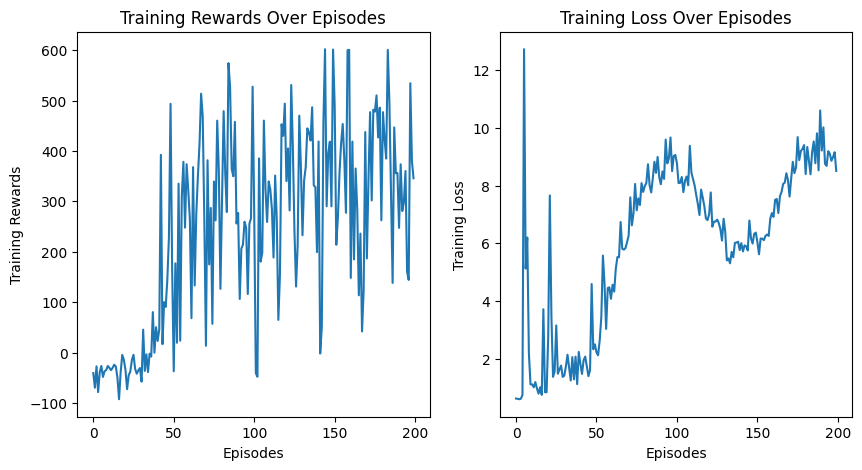

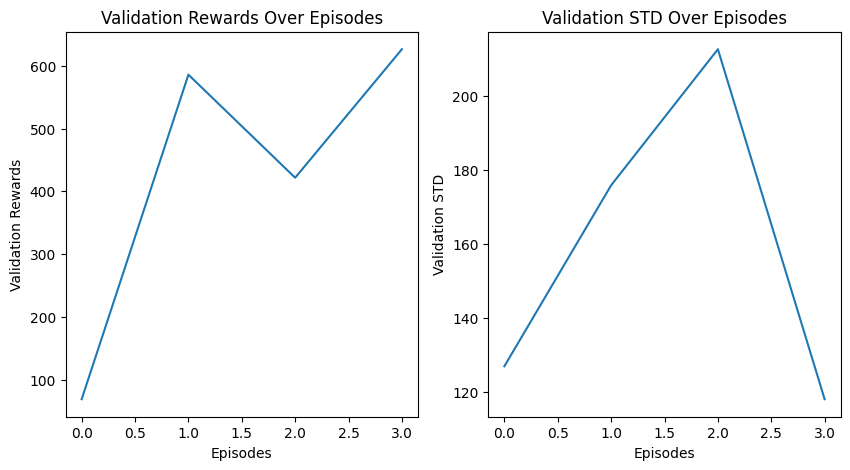

In [ ]:
plotgraphs(train_reward_history, train_loss_history, val_reward_history, val_std_history)

In [ ]:
total_rewards, frames = traineSoftUpdateDQN.play_episode(0,True,42)
anim = animate(frames)
HTML(anim.to_jshtml())

#### Questions:
- Which method performed better? (5 points)
- If we modify the $\tau$ for soft updates or the $C$ for the hard updates, how does this affect the performance of the model, come up with a intuition for this, then experimentally verify this.
 (5 points)

1) Experimentally, the vanilla DQN performed the best in terms of maximizing the rewards across the test episodes. It had a slightly larger average test reward (613) than the soft update DQN (609). However, it had a larger standard deviation (227) than the soft update DQN (118), meaning the soft update DQN performed more consistently across the test episodes. The hard update DQN performed the worst, with an average test reward of (345), probably due to having explored bad states. From the animation, the vanilla DQN model drives the smoothest, which aligns with the experimental results.

2) If we modify $\tau$ for the soft updates, in each update step of the Polyak averaging algorithm, more or less of the model weights will be incorporated into the target model, depending on how large or small $\tau$ is, respectively. For example, with a smaller $\tau$, the target model will be more dissimilar to the model during the early states in training, while with a larger $\tau$, the target model will be more similar to the model. We may pick either modification depending on the volatility of the environment. 
Modifying C in hard updates, changes the update frequency, which could help or harm training depending on the environment. For example, in a more stable environment, it might be beneficial to increase C, or decrease the frequency, so that the target model does not change as quickly, perhaps leading to smoother convergence. In a less stable environment, it might be beneficial to decrease C, or increase the frequency, such that the target model can more quickly adapt to the environment so we can learn a better model.
After retraining the models for 200 episodes (C=150, $\tau$=0.05), I found that the hard update model improved by a big margin (345 to 536) while the soft update model saw a massive drop in performance (609 to 256).

saving to ./runs/DoubleDQN_HardUpdates/run3


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Episode: 0: Time: 11.949295043945312 Total Reward: -40.51282051282131 Avg_Loss: 0.6321769107746172
Episode: 1: Time: 17.746076107025146 Total Reward: -69.452554744526 Avg_Loss: 0.621667267692064
Episode: 2: Time: 14.568273782730103 Total Reward: -27.142857142857096 Avg_Loss: 0.6136113986052072
Episode: 3: Time: 13.936760425567627 Total Reward: -64.69696969697024 Avg_Loss: 0.6440507979014841
Episode: 4: Time: 13.325375318527222 Total Reward: 0.07042253521076036 Avg_Loss: 0.6920071822677215
Episode: 5: Time: 13.142870426177979 Total Reward: -18.664122137405318 Avg_Loss: 0.8949367003593626
Episode: 6: Time: 13.661383152008057 Total Reward: 6.5624999999998135 Avg_Loss: 0.9557087166751382
Episode: 7: Time: 15.387717008590698 Total Reward: -51.521739130435506 Avg_Loss: 0.8619467002190963
Episode: 8: Time: 13.67305874824524 Total Reward: -68.484848484849 Avg_Loss: 0.8780942023614374
Episode: 9: Time: 13.601462364196777 Total Reward: -55.784313725490904 Avg_Loss: 0.7803905617696147
Episode: 10

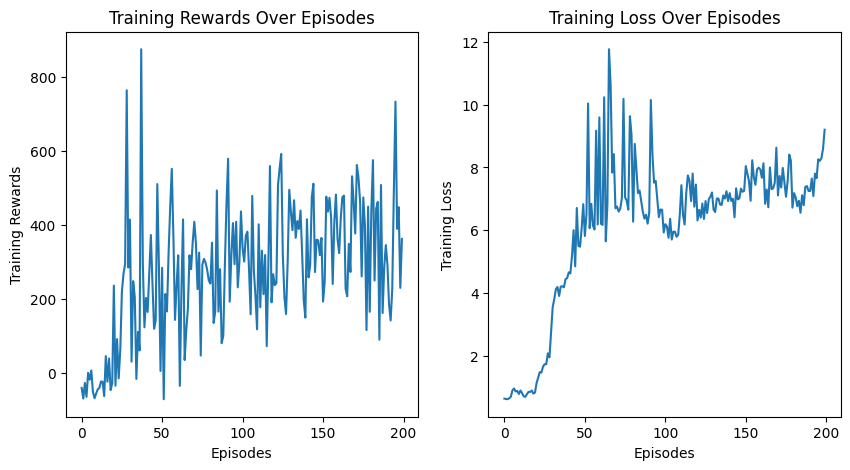

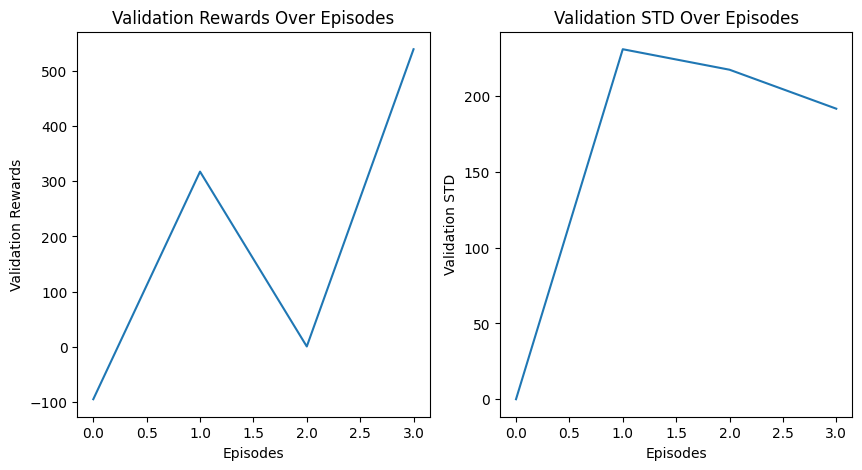

In [ ]:
import DQN
import utils
import torch
trainerHardUpdateDQN = DQN.HardUpdateDQN(EnvWrapper(env),
                model.Nature_Paper_Conv,
                update_freq = 150,
                lr = 0.00025,
                gamma = 0.95,
                buffer_size=10000,
                batch_size=16,
                loss_fn = "mse_loss",
                use_wandb = False,
                device = 'cuda',
                seed = 42,
                epsilon_scheduler = utils.exponential_decay(1, 1000,0.1),
                save_path = utils.get_save_path("DoubleDQN_HardUpdates/","./runs/"))

train_reward_history, train_loss_history, val_reward_history, val_std_history = trainerHardUpdateDQN.train(200,50,30,50,50)
plotgraphs(train_reward_history, train_loss_history, val_reward_history, val_std_history)

In [ ]:
total_rewards, frames = trainerHardUpdateDQN.play_episode(0,True,42)
anim = animate(frames)
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

saving to ./runs/DoubleDQN_SoftUpdates\run7
Episode: 0: Time: 13.864311695098877 Total Reward: -40.51282051282131 Avg_Loss: 0.6315642541415895
Episode: 1: Time: 22.61904239654541 Total Reward: -69.452554744526 Avg_Loss: 0.6268227067423844
Episode: 2: Time: 23.80164122581482 Total Reward: -45.00000000000036 Avg_Loss: 0.5846558775607997
Episode: 3: Time: 24.23385739326477 Total Reward: -68.06397306397355 Avg_Loss: 0.6068605116349371
Episode: 4: Time: 24.33925461769104 Total Reward: -14.01408450704218 Avg_Loss: 0.6103121603627791
Episode: 5: Time: 22.995899200439453 Total Reward: -115.56412213740523 Avg_Loss: 0.7992601551277482
Episode: 6: Time: 25.341549396514893 Total Reward: 6.562499999999217 Avg_Loss: 6.0469637702242665
Episode: 7: Time: 24.49519968032837 Total Reward: -62.39130434782673 Avg_Loss: 1.0556705949061058
Episode: 8: Time: 26.707955837249756 Total Reward: 52.72727272727153 Avg_Loss: 3.7580896697688004
Episode: 9: Time: 26.952982425689697 Total Reward: 38.986928104574396 Avg

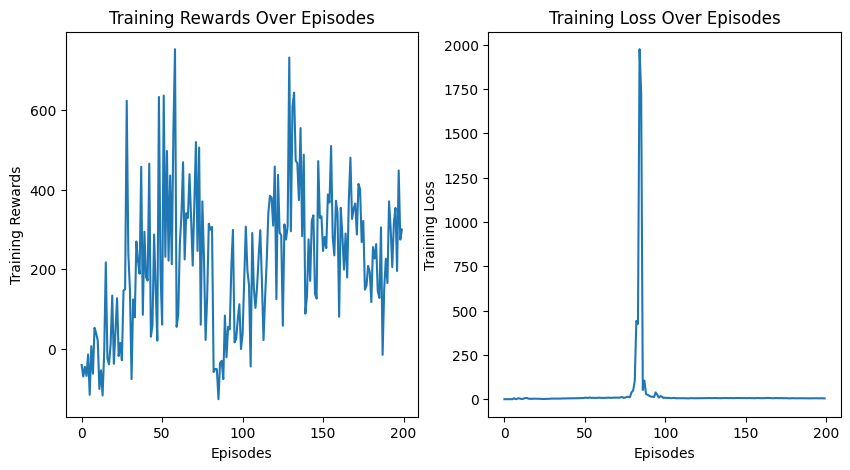

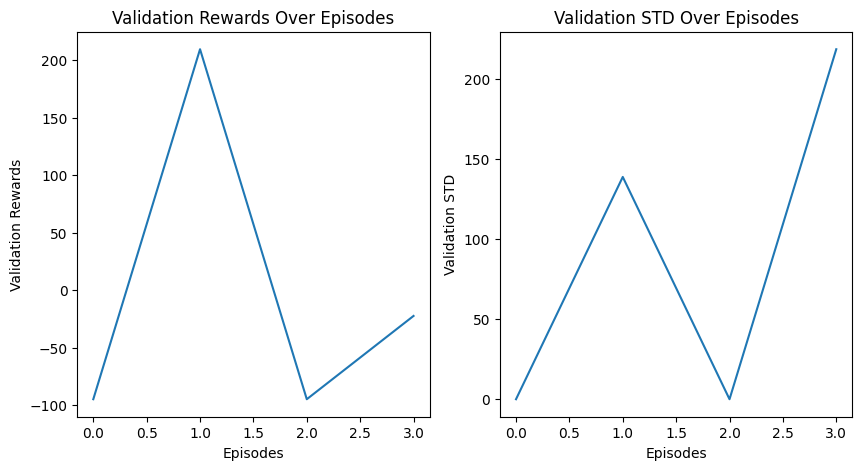

In [ ]:
import DQN
import utils
import torch
traineSoftUpdateDQN = DQN.SoftUpdateDQN(EnvWrapper(env),
                model.Nature_Paper_Conv,
                tau = 0.05,
                update_freq = 1,
                lr = 0.00025,
                gamma = 0.95,
                buffer_size=10000,
                batch_size=16,
                loss_fn = "mse_loss",
                use_wandb = False,
                device = 'cpu',
                seed = 42,
                epsilon_scheduler = utils.exponential_decay(1, 1000,0.1),
                save_path = utils.get_save_path("DoubleDQN_SoftUpdates","./runs/"))

train_reward_history, train_loss_history, val_reward_history, val_std_history = traineSoftUpdateDQN.train(200,50,30,50,50)
plotgraphs(train_reward_history, train_loss_history, val_reward_history, val_std_history)

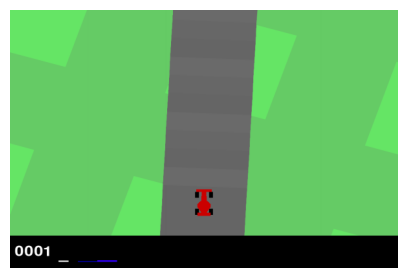

In [ ]:
total_rewards, frames = traineSoftUpdateDQN.play_episode(0,True,42)
anim = animate(frames)
HTML(anim.to_jshtml())